# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import json
import tweepy
import requests
import os
import glob
from tweepy import OAuthHandler
import re

In [2]:
#uploading the csv file
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# preview
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# download image_predictions using the request library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [5]:
# Read tsv file after download via request
df_image = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [8]:
# Creating Dataframe of tweet_json.txt

# step 1: Create a list to store the each tweets from the tweet_txt per column

tweet_list = []

json_file = open('tweet_json.txt', "r")

for ln in json_file:
    try:
        twt = json.loads(ln)
        tweet_list.append(twt)
    except:
        continue
        
json_file.close()

# Step 2: Create dataframe

tweet_df = pd.DataFrame()

tweet_df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweet_list))
tweet_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_list))
tweet_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_list))
tweet_df['created_at'] = list(map(lambda tweet: tweet['created_at'], tweet_list))
tweet_df['full_text'] = list(map(lambda tweet: tweet['full_text'], tweet_list))

# check for the extracted file
tweet_df

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...
...,...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015,Here we have a 1949 1st generation vulpix. Enj...
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015,This is a purebred Piers Morgan. Loves to Netf...
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015,Here is a very happy pup. Big fan of well-main...
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015,This is a western brown Mitsubishi terrier. Up...


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessment to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



**We have the three dataset:**
1. twitter archive uploaded directly: `df`
2. image prediction via request: `df_image`
3. tweets via api: `tweet_txt`


### Dataset 1: WeRateDogs Twitter archive

In [9]:
# df dataset
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


> From observation, there is a lot of null values in columns

In [10]:
# Assessing data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> `tweet_id` should be string instead of int64
> `timestamp` should be in datetime dtype

In [11]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# function to find duplicates in each column
def dupli(x):
    dup_list = []
    for col in x:
        if df[col].duplicated().sum() > 0:
            dup_list.append(col)
    return dup_list

dupli(df)

['in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [13]:
# check if there are any missing values

df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

# Accessing the names, doggo, floofer, pupper, puppo, and ratings columns

In [14]:
# checking the different names present in the name column
df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [15]:
# dog names that are name titles
df.name.str.istitle().value_counts()

True     2241
False     115
Name: name, dtype: int64

In [16]:
# dog names not name titles
df.name.loc[df.name.str.istitle() == False].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)

> Some dogs names are invalid such as 'such', 'a', 'actually'

> some dog names are not titled such as 'BeBe', 'DonDon', 'CeCe', 'JD', 'DayZ'

In [17]:
# checking teh names in the doggo column
df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [18]:
# checking the names in the floofer column
df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [19]:
# checking the names in the pupper column
df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [20]:
#checkingteh names in the puppo column
df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [21]:
# how many dogs are both doggo and floofer

df[(df.doggo == "doggo") & (df.floofer == "floofer")].shape

(1, 17)

In [22]:
# how many dogs are both doggo and pupper

df[(df.doggo == "doggo") & (df.pupper == "pupper")].shape

(12, 17)

In [23]:
# how many dogs are both doggo and puppo

df[(df.doggo == "doggo") & (df.puppo == "puppo")].shape

(1, 17)

In [24]:
# how many dogs are both pupper and puppo

df[(df.pupper == "pupper") & (df.puppo == "puppo")].shape

(0, 17)

### Dataset 2: Image Predictions

In [25]:
df_image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> Some column names are not very explicit on their content like `p1`, `p1_conf`, `p1_dog`, also, we may have to join `p1`, `p2`, `p3` into one column.

In [26]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> `tweet_id` should be a string not an int, there are no missing values in the dataset

In [27]:
df_image.shape

(2075, 12)

In [28]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
# Missing values

df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [30]:
# Duplicated values:

df_image.duplicated().sum()

0

In [31]:
# view data types for p1, p2, p3

type(df_image.p1[0]), type(df_image.p2[0]), type(df_image.p3[0])

(str, str, str)

In [32]:
df_image.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [33]:
df_image.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [34]:
df_image.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [35]:
# Check for images with p1_conf greater than 100%

df_image[df_image.p1_conf > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [36]:
# Check for images with p2_conf greater than 100%

df_image[df_image.p2_conf > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [37]:
# Check for images with p3_conf greater than 100%

df_image[df_image.p3_conf > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [38]:
# verify how many predictions in p1 were rightly made.
df_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [39]:
# verify how many predictions in p2 were rightly made.
df_image.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [40]:
# verify how many predictions in p3 were rightly made.
df_image.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### Dataset 3: Tweet API data

In [41]:
tweet_df

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...
...,...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015,Here we have a 1949 1st generation vulpix. Enj...
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015,This is a purebred Piers Morgan. Loves to Netf...
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015,Here is a very happy pup. Big fan of well-main...
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015,This is a western brown Mitsubishi terrier. Up...


In [42]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   created_at      2354 non-null   object
 4   full_text       2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


> `tweet_id` should be string instead of int

> `created_at` should be datetime

In [43]:
tweet_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
created_at        0
full_text         0
dtype: int64

In [44]:
# check for duplicated rows

tweet_df.duplicated().sum()

0

In [45]:
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [46]:
# check using full_text, the dogs that have two stages (doggo and floofer)

tweet_df.full_text[(tweet_df.full_text.str.contains ('doggo')) & (tweet_df.full_text.str.contains ('floofer'))].count()

0

In [47]:
# check using full_text, the dogs that have two stages (doggo and pupper)

tweet_df.full_text[(tweet_df.full_text.str.contains ('doggo')) & (tweet_df.full_text.str.contains ('pupper'))].count()

10

In [48]:
# check using full_text, the dogs that have two stages (doggo and puppo)

tweet_df.full_text[(tweet_df.full_text.str.contains ('doggo')) & (tweet_df.full_text.str.contains ('puppo'))].count()

2

In [49]:
# check using full_text, the dogs that have two stages (floofer and pupper)

tweet_df.full_text[(tweet_df.full_text.str.contains ('floofer')) & (tweet_df.full_text.str.contains ('pupper'))].count()

0

In [50]:
# check using full_text, the dogs that have two stages (floofer and puppo)

tweet_df.full_text[(tweet_df.full_text.str.contains ('floofer')) & (tweet_df.full_text.str.contains ('puppo'))].count()

0

In [51]:
# check using full_text, the dogs that have two stages (pupper and puppo)

tweet_df.full_text[(tweet_df.full_text.str.contains ('pupper')) & (tweet_df.full_text.str.contains ('puppo'))].count()

0

### Quality issues
1. Missing data in the df dataset. Like `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `source` and `expanded_urls`.


2. `tweet_id` should be string not int. I will convert it to string since there is no calculation required.


3. `created_at`, `retweeted_status_timestamp` current type is object (str) rather than datetime. I will change it to datetime.


4. `in_reply_to_status_id`, `in_reply_to_user_id`, `timestamp` amongst other columns to be dropped. 


5. Change the first letter of all names to uppercase


6. Doggo, floofer, pupper, puppo column all carry some None values, we could drop those values.


7. Some invalid dog names exist ('None', 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space'). Also dog names are not titled ('BeBe','DonDon','CeCe', 'JD', 'DayZ')


8. Retweets are not original tweets, keep only original tweets.

9. Drop all predictions that are not dog predictions.

### Tidiness issues
1. Merge the three datasets.


2. The twitter_archive dataset: doggo, floofer, pupper, puppo (dog types) columns needs to be restructured.


3. Restructure p1, p2 and p3 as one column dog_breed 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

> **For the cleaning process**, I took the option of creating copies of each dataset, merging this copies into one dataframe, then performing the quality and tidiness cleaning on the data.

In [52]:
# Make copies of original pieces of data
df_clean = df.copy()
image_clean = df_image.copy()
tweet_clean = tweet_df.copy()

### Issue #1: We are going to be taking care of all the tidiness issues mentioned. Some quality issues will also be taken care of in the process!

#### Define: Merge the 3 copy datasets using INNER join.

#### Code

In [53]:
# Merge the 3 dataframes into a new df; tweet_new_df

tweet_new_df = pd.merge(df_clean, image_clean, how = 'inner', on = ['tweet_id'] )
tweet_new_df = pd.merge(tweet_new_df, tweet_clean, how = 'inner', on = ['tweet_id'])
tweet_new_df.to_csv('tweet_new.csv', encoding = 'utf-8')

#### Test

In [54]:
tweet_new_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...


In [55]:
tweet_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

#### Define: Replace None with an empty string

#### Code

In [56]:
# The archive_clean dataset: doggo, floofer, pupper, puppo (dog types) columns needs to be restructured
# replace None with an empty string
tweet_new_df.doggo.replace('None', '', inplace = True)
tweet_new_df.floofer.replace('None', '', inplace = True)
tweet_new_df.puppo.replace('None', '', inplace = True)
tweet_new_df.pupper.replace('None', '', inplace = True)

#### Define: Merge Columns into dog_types column

#### Code

In [57]:
# Merge four columns
tweet_new_df['dog_types'] = tweet_new_df.doggo + tweet_new_df.pupper + tweet_new_df.puppo + tweet_new_df.floofer

# drop doggo, floofer, pupper, puppo
dog_cols = ['doggo', 'floofer', 'pupper', 'puppo']
tweet_new_df.drop(columns=dog_cols, inplace=True)

#### Define: Seperate Dog types using |

#### Code:

In [58]:
# place a slash for multiple dog type
tweet_new_df.loc[tweet_new_df.dog_types == 'doggopupper', 'dog_types'] = 'doggo|pupper'
tweet_new_df.loc[tweet_new_df.dog_types == 'doggopuppo', 'dog_types'] = 'doggo|puppo'
tweet_new_df.loc[tweet_new_df.dog_types == 'doggofloofer', 'dog_types'] = 'doggo|floofer'

#### Test

In [59]:
tweet_new_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count', 'created_at', 'full_text',
       'dog_types'],
      dtype='object')

In [60]:
tweet_new_df.dog_types.value_counts()

                 1753
pupper            210
doggo              67
puppo              23
doggo|pupper       11
floofer             7
doggo|puppo         1
doggo|floofer       1
Name: dog_types, dtype: int64

#### Define: Drop probabilities of not dog

#### Code:

In [61]:
# Find indexes of pictures that are not of dogs
not_dog = tweet_new_df[(tweet_new_df["p1_dog"] == False) &
         (tweet_new_df["p2_dog"] == False) &
         (tweet_new_df["p3_dog"] == False)]["tweet_id"].index

# Find indexes of pictures that are have a low prediction confidence <0.25
no_dog = tweet_new_df[(tweet_new_df["p1_dog"] == False) &
         (tweet_new_df["p2_conf"] < 0.25) &
         (tweet_new_df["p3_conf"] < 0.25)]["tweet_id"].index

remove_row = not_dog.append(no_dog)

tweet_new_df.drop(remove_row, inplace=True)

#### Test:

In [62]:
tweet_new_df[['p1','p2','p3']].head(10)

,p1,p2,p3
1,Chihuahua,Pekinese,papillon
2,Chihuahua,malamute,kelpie
4,basset,English_springer,German_short-haired_pointer
5,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant
6,Appenzeller,Border_collie,ice_lolly
7,Pomeranian,Eskimo_dog,Pembroke
8,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever
9,Pembroke,Cardigan,Chihuahua
10,Samoyed,Pomeranian,chow
11,French_bulldog,Labrador_retriever,muzzle


#### Define: Replacing every underscore with space

#### Code:

In [63]:
# Replace underscore with space

tweet_new_df['p1'] = tweet_new_df.p1.str.replace('_',' ')
tweet_new_df['p2'] = tweet_new_df.p2.str.replace('_',' ')
tweet_new_df['p3'] = tweet_new_df.p3.str.replace('_',' ')

# Capitalize the content (every word) using title

tweet_new_df['p1'] = tweet_new_df.p1.str.title()
tweet_new_df['p2'] = tweet_new_df.p2.str.title()
tweet_new_df['p3'] = tweet_new_df.p3.str.title()

***Test***

In [64]:
tweet_new_df[['p1','p2','p3']].head(10)

,p1,p2,p3
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
4,Basset,English Springer,German Short-Haired Pointer
5,Chesapeake Bay Retriever,Irish Terrier,Indian Elephant
6,Appenzeller,Border Collie,Ice Lolly
7,Pomeranian,Eskimo Dog,Pembroke
8,Irish Terrier,Irish Setter,Chesapeake Bay Retriever
9,Pembroke,Cardigan,Chihuahua
10,Samoyed,Pomeranian,Chow
11,French Bulldog,Labrador Retriever,Muzzle


#### Define: Restructure and Delete `p1`,`p1_conf`,`p1_dog`,`p2`,`p2_conf`,`p2_dog`,`p3`,`p3_conf`,`p3_dog` columns

#### Code:

In [65]:
# creating 2 empty lists to save choices for each row in the dataset

dog_breed = []
breed_confidence = []

# this function iterates through prediction columns to find the best prediction which is a breed of dog

def confidence(row):
    if row['p1_dog'] == True:
        dog_breed.append(row['p1'])
        breed_confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        dog_breed.append(row['p2'])
        breed_confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        dog_breed.append(row['p3'])
        breed_confidence.append(row['p3_conf'])
    else:
        dog_breed.append('Unknown')
        breed_confidence.append(0)
        

tweet_new_df.apply(confidence, axis=1)

# adding to dataframe

tweet_new_df['dog_breed'] = dog_breed
tweet_new_df['breed_confidence'] = breed_confidence

In [66]:
# Drop 'p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog' columns

tweet_new_df = tweet_new_df.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

#### Test:

In [67]:
tweet_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 1 to 2072
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1548 non-null   int64  
 1   in_reply_to_status_id       14 non-null     float64
 2   in_reply_to_user_id         14 non-null     float64
 3   timestamp                   1548 non-null   object 
 4   source                      1548 non-null   object 
 5   text                        1548 non-null   object 
 6   retweeted_status_id         55 non-null     float64
 7   retweeted_status_user_id    55 non-null     float64
 8   retweeted_status_timestamp  55 non-null     object 
 9   expanded_urls               1548 non-null   object 
 10  rating_numerator            1548 non-null   int64  
 11  rating_denominator          1548 non-null   int64  
 12  name                        1548 non-null   object 
 13  jpg_url                     1548 

### Issue #2: From here on, we will be taking care of the remaining quality issues

#### Define: Clear all retweets and replies

#### Code:

In [68]:
tweet_new_df = tweet_new_df[tweet_new_df.in_reply_to_status_id.isnull() == True]
tweet_new_df = tweet_new_df[tweet_new_df.retweeted_status_id.isnull() == True]

#### Test:

In [69]:
tweet_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 1 to 2072
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1479 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1479 non-null   object 
 4   source                      1479 non-null   object 
 5   text                        1479 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1479 non-null   object 
 10  rating_numerator            1479 non-null   int64  
 11  rating_denominator          1479 non-null   int64  
 12  name                        1479 non-null   object 
 13  jpg_url                     1479 

#### Define: Drop all retweets and replies column, expanded_urls and source column as they would no longer be needed

#### Code:

In [70]:
remove_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
               'retweeted_status_timestamp', 'expanded_urls', 'source','text','img_num', 'jpg_url', 'timestamp']
tweet_new_df.drop(columns=remove_cols, inplace=True)

#### Test

In [71]:
tweet_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 1 to 2072
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1479 non-null   int64  
 1   rating_numerator    1479 non-null   int64  
 2   rating_denominator  1479 non-null   int64  
 3   name                1479 non-null   object 
 4   retweet_count       1479 non-null   int64  
 5   favorite_count      1479 non-null   int64  
 6   created_at          1479 non-null   object 
 7   full_text           1479 non-null   object 
 8   dog_types           1479 non-null   object 
 9   dog_breed           1479 non-null   object 
 10  breed_confidence    1479 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 138.7+ KB


#### Define: Correct the Data Types

#### Code:

In [72]:
# created_at to datetime
tweet_new_df.created_at = pd.to_datetime(tweet_new_df['created_at'])

# tweet_id to str
tweet_new_df.tweet_id = tweet_new_df.tweet_id.astype(str)

# ratings to float
tweet_new_df.rating_denominator = tweet_new_df.rating_denominator.astype(float)
tweet_new_df.rating_numerator = tweet_new_df.rating_numerator.astype(float)

#### Test:

In [73]:
tweet_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 1 to 2072
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1479 non-null   object             
 1   rating_numerator    1479 non-null   float64            
 2   rating_denominator  1479 non-null   float64            
 3   name                1479 non-null   object             
 4   retweet_count       1479 non-null   int64              
 5   favorite_count      1479 non-null   int64              
 6   created_at          1479 non-null   datetime64[ns, UTC]
 7   full_text           1479 non-null   object             
 8   dog_types           1479 non-null   object             
 9   dog_breed           1479 non-null   object             
 10  breed_confidence    1479 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(5)
memory usage: 138.7+ KB


#### Define:  Correct erroneous names

#### Code:

In [74]:
tweet_new_df.name.value_counts()

None          353
a              43
Cooper         10
Charlie        10
Oliver          9
             ... 
Grey            1
Willem          1
Davey           1
Fizz            1
Christoper      1
Name: name, Length: 770, dtype: int64

In [75]:
# Show all names that start with lower case

tweet_new_df[tweet_new_df['name'].str.islower()][['tweet_id','full_text','name']]

,tweet_id,full_text,name
50,881536004380872706,Here is a pupper approaching maximum borkdrive...,a
155,855459453768019968,"Guys, we only rate dogs. This is quite clearly...",quite
293,828650029636317184,"Occasionally, we're sent fantastic stories. Th...",one
438,806219024703037440,We only rate dogs. Please stop sending in non-...,incredibly
647,772581559778025472,Guys this is getting so out of hand. We only r...,a
...,...,...,...
2065,666055525042405380,Here is a Siberian heavily armored polar bear ...,a
2067,666050758794694657,This is a truly beautiful English Wilson Staff...,a
2069,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,a
2070,666033412701032449,Here is a very happy pup. Big fan of well-main...,a


In [76]:
# Creating 3 lists:

## lwr_name_is where the name starts with lower case and the `full_text` column includes the string "name is":
## lwr_named where the name starts with lower case and the `full_text` column includes the string "named":
## lwr where the name starts with lower case:

lwr_name_is = tweet_new_df.loc[(tweet_new_df['name'].str.islower()) & (tweet_new_df['full_text'].str.contains('name is'))]['tweet_id'].tolist()

lwr_named = tweet_new_df.loc[(tweet_new_df['name'].str.islower()) & (tweet_new_df['full_text'].str.contains('named'))]['tweet_id'].tolist()

lwr = tweet_new_df.loc[(tweet_new_df['name'].str.islower())]['tweet_id'].tolist()


# a loop that returns the word after the string "name is" and assigns it to column 'name'

for twt in lwr_name_is:
    text = tweet_new_df.full_text[tweet_new_df.tweet_id == twt].iloc[0]
    tweet_new_df.loc[tweet_new_df.tweet_id == twt,'name'] = re.findall("name is\s(\w+)", text)

# a loop that returns the word after the string "name is" and assigns it to column 'name'

for twt in lwr_named:
    text = tweet_new_df.full_text[tweet_new_df.tweet_id == twt].iloc[0]
    tweet_new_df.loc[tweet_new_df.tweet_id == twt,'name'] = re.findall(r"named\s(\w+)", text)    

# ar loop that assigns "None" to column 'name'
for twt in lwr:
    text = tweet_new_df.full_text[tweet_new_df.tweet_id == twt].iloc[0]
    tweet_new_df.loc[tweet_new_df.tweet_id == twt,'name'] = "None"

In [77]:
# drop dog names with None
tweet_new_df = tweet_new_df.loc[tweet_new_df.name != 'None']

# drop text that says 'We only rate dogs'
remove_row = tweet_new_df[tweet_new_df['full_text'].str.contains("We only rate dogs")]["tweet_id"].index
tweet_new_df.drop(remove_row, inplace=True)

#### Test:

In [78]:
tweet_new_df.name.value_counts()

Charlie       10
Cooper        10
Oliver         9
Lucy           8
Tucker         8
              ..
Grey           1
Willem         1
Davey          1
Fizz           1
Christoper     1
Name: name, Length: 753, dtype: int64

In [79]:
tweet_new_df

,tweet_id,rating_numerator,rating_denominator,name,retweet_count,favorite_count,created_at,full_text,dog_types,dog_breed,breed_confidence
1,892177421306343426,13.0,10.0,Tilly,6514,33819,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,,Chihuahua,0.323581
2,891815181378084864,12.0,10.0,Archie,4328,25461,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,,Chihuahua,0.716012
4,891327558926688256,12.0,10.0,Franklin,9774,41048,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,,Basset,0.555712
6,890971913173991426,13.0,10.0,Jax,2158,12041,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,,Appenzeller,0.341703
8,890609185150312448,13.0,10.0,Zoey,4429,28226,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,,Irish Terrier,0.487574
...,...,...,...,...,...,...,...,...,...,...,...
2032,666691418707132416,8.0,10.0,Christoper,51,196,2015-11-17 18:56:35+00:00,This is Christoper. He is a spotted Penne. Can...,,German Shepherd,0.975401
2034,666644823164719104,9.0,10.0,Jimothy,88,238,2015-11-17 15:51:26+00:00,This is Jimothy. He is a Botwanian Gouda. Can ...,,Ibizan Hound,0.044333
2035,666454714377183233,10.0,10.0,Kreggory,223,545,2015-11-17 03:16:00+00:00,I'll name the dogs from now on. This is Kreggo...,,Dalmatian,0.278954
2036,666447344410484738,9.0,10.0,Scout,23,107,2015-11-17 02:46:43+00:00,This is Scout. She is a black Downton Abbey. I...,,Curly-Coated Retriever,0.322084


In [80]:
tweet_new_df.head(5)

,tweet_id,rating_numerator,rating_denominator,name,retweet_count,favorite_count,created_at,full_text,dog_types,dog_breed,breed_confidence
1,892177421306343426,13.0,10.0,Tilly,6514,33819,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,,Chihuahua,0.323581
2,891815181378084864,12.0,10.0,Archie,4328,25461,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,,Chihuahua,0.716012
4,891327558926688256,12.0,10.0,Franklin,9774,41048,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,,Basset,0.555712
6,890971913173991426,13.0,10.0,Jax,2158,12041,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,,Appenzeller,0.341703
8,890609185150312448,13.0,10.0,Zoey,4429,28226,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,,Irish Terrier,0.487574


#### Define: Rearrange the columns

#### Code:

In [81]:
# Create a list to re-sort the dataframe columns
sort_cols = ['tweet_id', 'created_at', 'name','full_text','dog_types', 'dog_breed','retweet_count', 'favorite_count',
             'rating_numerator', 'rating_denominator', 'breed_confidence']

tweet_new_df = tweet_new_df[sort_cols]

#### Test:

In [82]:
tweet_new_df

,tweet_id,created_at,name,full_text,dog_types,dog_breed,retweet_count,favorite_count,rating_numerator,rating_denominator,breed_confidence
1,892177421306343426,2017-08-01 00:17:27+00:00,Tilly,This is Tilly. She's just checking pup on you....,,Chihuahua,6514,33819,13.0,10.0,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Archie,This is Archie. He is a rare Norwegian Pouncin...,,Chihuahua,4328,25461,12.0,10.0,0.716012
4,891327558926688256,2017-07-29 16:00:24+00:00,Franklin,This is Franklin. He would like you to stop ca...,,Basset,9774,41048,12.0,10.0,0.555712
6,890971913173991426,2017-07-28 16:27:12+00:00,Jax,Meet Jax. He enjoys ice cream so much he gets ...,,Appenzeller,2158,12041,13.0,10.0,0.341703
8,890609185150312448,2017-07-27 16:25:51+00:00,Zoey,This is Zoey. She doesn't want to be one of th...,,Irish Terrier,4429,28226,13.0,10.0,0.487574
...,...,...,...,...,...,...,...,...,...,...,...
2032,666691418707132416,2015-11-17 18:56:35+00:00,Christoper,This is Christoper. He is a spotted Penne. Can...,,German Shepherd,51,196,8.0,10.0,0.975401
2034,666644823164719104,2015-11-17 15:51:26+00:00,Jimothy,This is Jimothy. He is a Botwanian Gouda. Can ...,,Ibizan Hound,88,238,9.0,10.0,0.044333
2035,666454714377183233,2015-11-17 03:16:00+00:00,Kreggory,I'll name the dogs from now on. This is Kreggo...,,Dalmatian,223,545,10.0,10.0,0.278954
2036,666447344410484738,2015-11-17 02:46:43+00:00,Scout,This is Scout. She is a black Downton Abbey. I...,,Curly-Coated Retriever,23,107,9.0,10.0,0.322084


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [83]:
tweet_new_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [84]:
df1 = pd.read_csv('./twitter_archive_master.csv')
df1.head()

,tweet_id,created_at,name,full_text,dog_types,dog_breed,retweet_count,favorite_count,rating_numerator,rating_denominator,breed_confidence
0,892177421306343426,2017-08-01 00:17:27+00:00,Tilly,This is Tilly. She's just checking pup on you....,NaN,Chihuahua,6514,33819,13.0,10.0,0.323581
1,891815181378084864,2017-07-31 00:18:03+00:00,Archie,This is Archie. He is a rare Norwegian Pouncin...,NaN,Chihuahua,4328,25461,12.0,10.0,0.716012
2,891327558926688256,2017-07-29 16:00:24+00:00,Franklin,This is Franklin. He would like you to stop ca...,NaN,Basset,9774,41048,12.0,10.0,0.555712
3,890971913173991426,2017-07-28 16:27:12+00:00,Jax,Meet Jax. He enjoys ice cream so much he gets ...,NaN,Appenzeller,2158,12041,13.0,10.0,0.341703
4,890609185150312448,2017-07-27 16:25:51+00:00,Zoey,This is Zoey. She doesn't want to be one of th...,NaN,Irish Terrier,4429,28226,13.0,10.0,0.487574


In [85]:
df1['dog_breed'].value_counts()

Golden Retriever      95
Pembroke              64
Labrador Retriever    64
Chihuahua             59
Pug                   39
                      ..
Scotch Terrier         1
Japanese Spaniel       1
Standard Schnauzer     1
Gordon Setter          1
Brabancon Griffon      1
Name: dog_breed, Length: 109, dtype: int64

>From the above statistics, we observe that the most common dog breed rated is the Golden Retriever(95)

In [86]:
df1['dog_types'].value_counts()

pupper          85
doggo           29
puppo           14
floofer          5
doggo|pupper     3
Name: dog_types, dtype: int64

>From the above statistics, we observe that the most common dog type is the pupper(85)

In [87]:
df1['name'].value_counts()

Charlie       10
Cooper        10
Oliver         9
Lucy           8
Tucker         8
              ..
Grey           1
Willem         1
Davey          1
Fizz           1
Christoper     1
Name: name, Length: 753, dtype: int64

>From the above statistics, we observe that the most common dog names were Charlie and Cooper

In [88]:
# group dataset by dog breed, by dog type and by name
df1_breed = df1.groupby(['dog_breed']).sum()
df1_type = df1.groupby(['dog_types']).sum()
df1_name = df1.groupby(['name']).sum()

In [89]:
df1_breed

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,breed_confidence
dog_breed,,,,,,
Afghan Hound,2.412486e+18,17928,51980,29.0,30.0,1.301878
Airedale,6.525036e+18,14106,54524,92.0,90.0,5.510836
American Staffordshire Terrier,7.590439e+18,20705,77191,109.0,100.0,6.623528
Appenzeller,8.909719e+17,2158,12041,13.0,10.0,0.341703
Australian Terrier,1.557184e+18,6157,22255,23.0,20.0,0.615167
...,...,...,...,...,...,...
Welsh Springer Spaniel,1.442958e+18,1019,5562,19.0,20.0,0.934632
West Highland White Terrier,4.390944e+18,7113,37638,63.0,60.0,3.847305
Whippet,5.403429e+18,18666,66189,76.0,70.0,3.559101


In [90]:
df1_type

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,breed_confidence
dog_types,,,,,,
doggo,2.376684e+19,165740,571723,358.0,290.0,17.041746
doggo|pupper,2.378686e+18,7686,27513,37.0,30.0,2.542488
floofer,3.852196e+18,11236,47795,58.0,50.0,2.923533
pupper,6.199686e+19,209337,717801,920.0,850.0,56.585015
puppo,1.131957e+19,44564,169225,165.0,140.0,10.116101


In [91]:
df1_name

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,breed_confidence
name,,,,,,
Abby,1491722466608648192,2753,9925,21.0,20.0,0.683986
Ace,753294487569522688,1191,3758,11.0,10.0,0.194773
Acro,674019345211760640,340,1208,10.0,10.0,0.992732
Adele,705975130514706432,842,3397,10.0,10.0,0.587764
Aiden,674014384960745472,714,1676,11.0,10.0,0.742320
...,...,...,...,...,...,...
Zeus,715680795826982912,1813,4719,12.0,10.0,0.990715
Ziva,730211855403241472,1182,4180,11.0,10.0,0.341663
Zoe,750383411068534784,1309,5005,9.0,10.0,0.672791


In [92]:
# sort dog breed by favourite counts
df1_breed.sort_values(by=['favorite_count'],ascending=False)

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,breed_confidence
dog_breed,,,,,,
Golden Retriever,7.329526e+19,366598,1283423,1114.0,947.0,67.833893
Labrador Retriever,4.808945e+19,199472,728121,719.0,640.0,41.928230
Pembroke,4.861096e+19,201129,725412,741.0,640.0,46.080324
Chihuahua,4.330285e+19,174083,545599,629.0,590.0,34.597093
French Bulldog,1.820007e+19,117666,447576,262.0,230.0,17.765186
...,...,...,...,...,...,...
Standard Schnauzer,6.757109e+17,928,2046,12.0,10.0,0.441427
Groenendael,6.939424e+17,413,1896,10.0,10.0,0.550796
Japanese Spaniel,6.773010e+17,471,1362,5.0,10.0,0.661178


>From the above statistics, we observe that the dog breed with the highest favorite count is Golden Retriever

In [93]:
# sort dog breed by favourite counts
df1_breed.sort_values(by=['retweet_count'],ascending=False)

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,breed_confidence
dog_breed,,,,,,
Golden Retriever,7.329526e+19,366598,1283423,1114.0,947.0,67.833893
Pembroke,4.861096e+19,201129,725412,741.0,640.0,46.080324
Labrador Retriever,4.808945e+19,199472,728121,719.0,640.0,41.928230
Chihuahua,4.330285e+19,174083,545599,629.0,590.0,34.597093
French Bulldog,1.820007e+19,117666,447576,262.0,230.0,17.765186
...,...,...,...,...,...,...
Standard Schnauzer,6.757109e+17,928,2046,12.0,10.0,0.441427
Japanese Spaniel,6.773010e+17,471,1362,5.0,10.0,0.661178
Groenendael,6.939424e+17,413,1896,10.0,10.0,0.550796


>From the above statistics, we observe that the dog breed with the highest retweet count is Golden Retriever

In [94]:
# sort dog types by favourite counts
df1_type.sort_values(by=['favorite_count'],ascending=False)

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,breed_confidence
dog_types,,,,,,
pupper,6.199686e+19,209337,717801,920.0,850.0,56.585015
doggo,2.376684e+19,165740,571723,358.0,290.0,17.041746
puppo,1.131957e+19,44564,169225,165.0,140.0,10.116101
floofer,3.852196e+18,11236,47795,58.0,50.0,2.923533
doggo|pupper,2.378686e+18,7686,27513,37.0,30.0,2.542488


>From the above statistics, we observe that the dog types with the highest favorite count is pupper

In [95]:
# sort dog types by favourite counts
df1_type.sort_values(by=['retweet_count'],ascending=False)

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,breed_confidence
dog_types,,,,,,
pupper,6.199686e+19,209337,717801,920.0,850.0,56.585015
doggo,2.376684e+19,165740,571723,358.0,290.0,17.041746
puppo,1.131957e+19,44564,169225,165.0,140.0,10.116101
floofer,3.852196e+18,11236,47795,58.0,50.0,2.923533
doggo|pupper,2.378686e+18,7686,27513,37.0,30.0,2.542488


>From the above statistics, we observe that the dog types with the highest retweet count is pupper

In [96]:
# sort dog name by favourite counts
df1_name.sort_values(by=['favorite_count'],ascending=False)

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,breed_confidence
name,,,,,,
Bo,3800837682296291328,54924,136148,60.0,50.0,3.268917
Zoey,1760983234430976000,32109,113237,26.0,20.0,1.328575
Duddles,879415818425184256,45849,107956,13.0,10.0,0.383404
Stephan,807106840509214720,56625,107015,13.0,10.0,0.505370
Jamesy,866450705531457536,32883,106827,13.0,10.0,0.905334
...,...,...,...,...,...,...
Lugan,666739327293083648,71,244,10.0,10.0,0.546933
Kenneth,667171260800061440,97,235,10.0,10.0,0.841265
Keet,667062181243039744,57,227,10.0,10.0,0.825678


>From the above statistics, we observe that the dog name with the highest favorite count is Bo

In [97]:
# sort dog name by favourite counts
df1_name.sort_values(by=['retweet_count'],ascending=False)

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,breed_confidence
name,,,,,,
Stephan,807106840509214720,56625,107015,13.0,10.0,0.505370
Bo,3800837682296291328,54924,136148,60.0,50.0,3.268917
Duddles,879415818425184256,45849,107956,13.0,10.0,0.383404
Buddy,2264065818210021376,37686,72809,34.0,30.0,1.460446
Jamesy,866450705531457536,32883,106827,13.0,10.0,0.905334
...,...,...,...,...,...,...
Kollin,669567591774625792,61,248,9.0,10.0,0.980511
Fwed,667393430834667520,60,211,8.0,10.0,0.557009
Keet,667062181243039744,57,227,10.0,10.0,0.825678


>From the above statistics, we observe that the dog name with the highest retweet count is Stephan

### Insights:
1. 1. Most common dog type is the pupper followed by the doggo and they both have the highest (717801) and second highest (571723) followers retweets 209337 and 165740 respectively.


2. Most common dog breed prediction is golden_retriever followed by pembroke and they both have the highest and second highest  retweets respectively.


3. The dog names Stephan, Bo and Duddles had the top three highest followers counts respectively

### Visualization

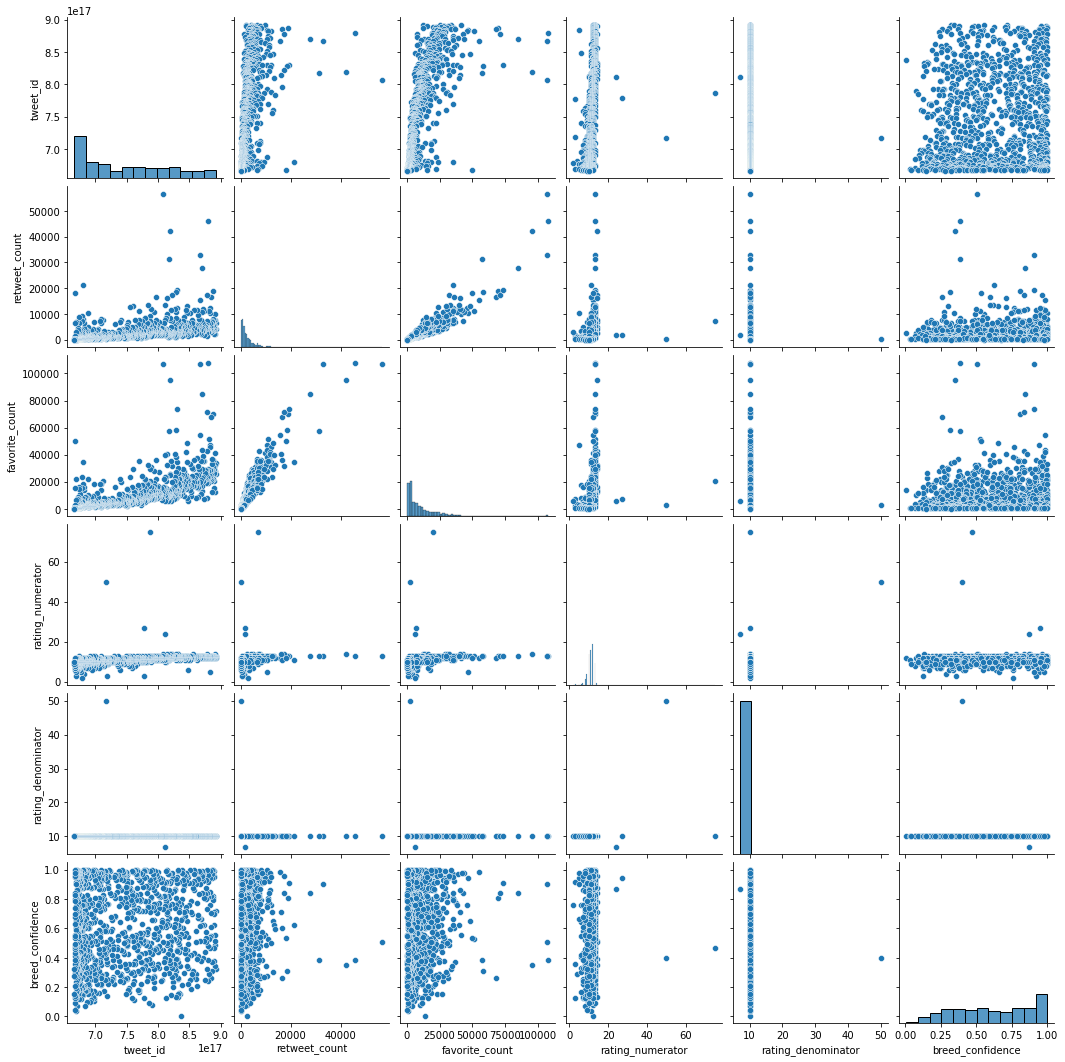

In [98]:
sns.pairplot(df1);

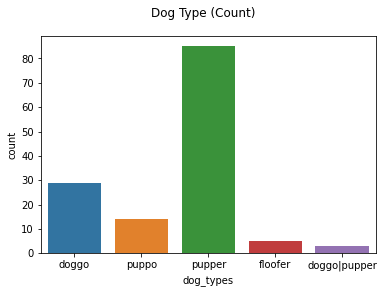

In [99]:
p = sns.countplot(data=df1, x='dog_types')
p.figure.suptitle('Dog Type (Count)');

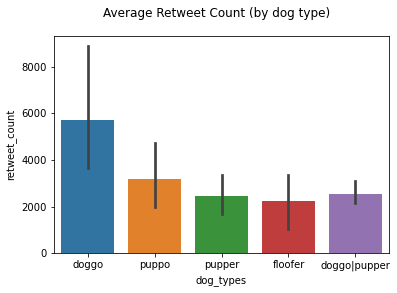

In [100]:
p=sns.barplot(data=df1, x='dog_types', y='retweet_count')
p.figure.suptitle('Average Retweet Count (by dog type)');

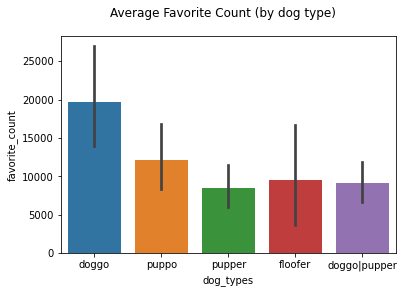

In [101]:
p=sns.barplot(data=df1, x='dog_types', y='favorite_count')
p.figure.suptitle('Average Favorite Count (by dog type)');

Looking at the plots above, we note the following:
- The pupper type has the highest count and the floofer and (doggo|pupper) has the lowest count.
- The average retweet_count for the doggo is the highest (about 5800 retweets), where the average retweet_count for the floofer is the lowest (less than 2,500). 
- Similarly, the average favorite_count for doggo type is highest (about 20000), and the pupper has the lowest average favorite count.

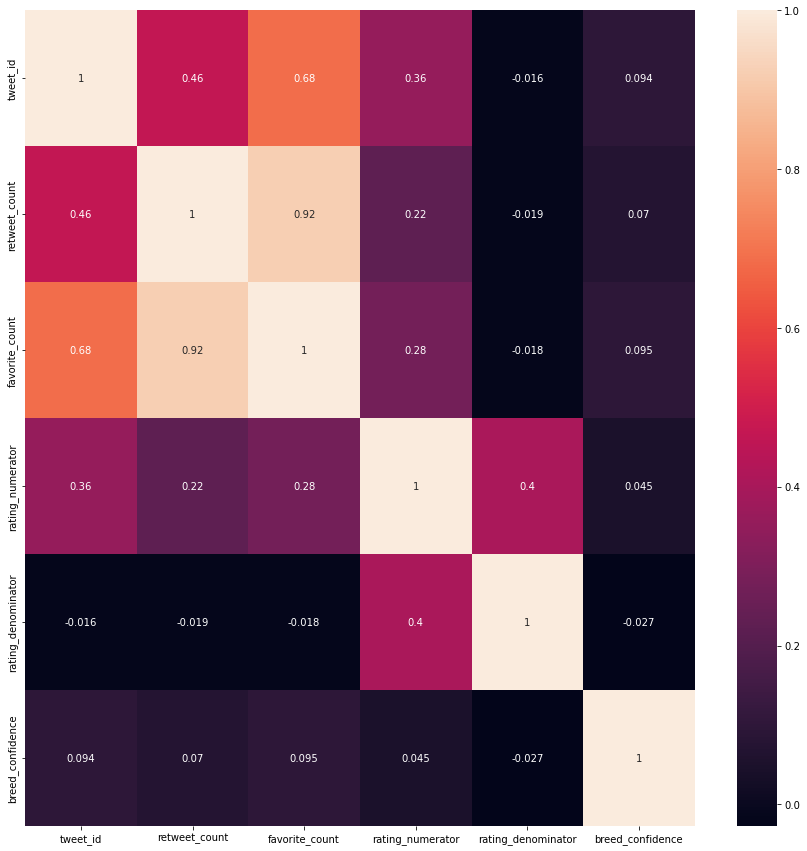

In [102]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(),annot=True, ax=ax);

Looking at the heatmap above, we note the following:

- There is a strong positive correlation (0.92) between `favorite_count` and `retweet_count` which support our observation above.
- There is a relatively weak negative correlation (-0.027) between `breed_confidence` and `rating_denominator` which is interesting as different predictions may have opposing confidence levels. 

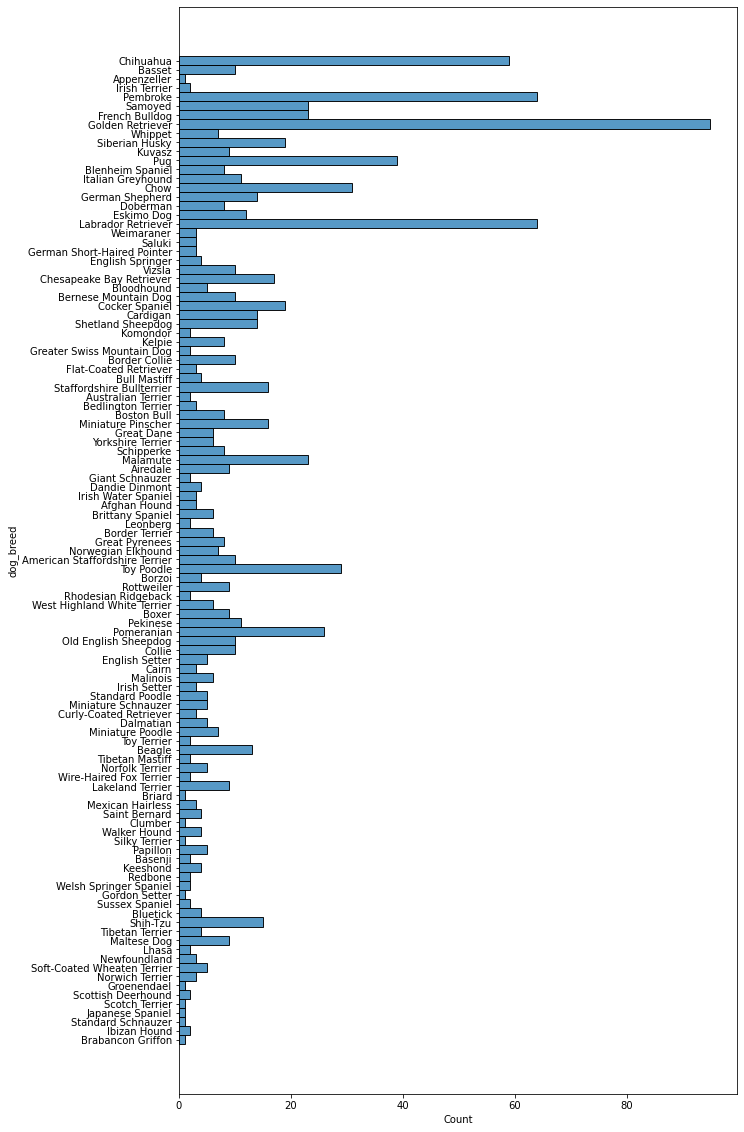

In [103]:
# Plot a histogram of dog_breed
dims = (10, 20)
fig, ax = plt.subplots(figsize=dims)
sns.histplot(ax=ax, y=df1['dog_breed'], stat="count");

> From the dog_breed histogram, we see that the *golden retriever* is the most common breed in the dataset, followed by the *labrador retriever*